# 0. Import packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# 1. Load Base Dataset

In [ ]:
INPUT_DIR='/content/drive/MyDrive/kaist-ie343-2023-spring'
OUTPUT_DIR='/content/drive/MyDrive/kaist-ie343-2023-spring/results'

In [ ]:
## Do not change this cell. 
## The reason for this is to prevent cheating using the original data from DACON. 
## If an assertion error occurs in that cell when TAs evaluate the submitted code of each student, it is considered cheating.

train = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))
park = pd.read_csv(os.path.join(INPUT_DIR, 'park.csv'))
dcc = pd.read_csv(os.path.join(INPUT_DIR, 'day_care_center.csv'))

assert train.shape[0] == 329690 and train.shape[1] == 13, 'Do not change the format of the input data.'
assert test.shape[0] == 85097 and test.shape[1] == 12, 'Do not change the format of the input data.'
assert park.shape[0] == 1359 and park.shape[1] == 7, 'Do not change the format of the input data.'
assert dcc.shape[0] == 7373 and dcc.shape[1] == 10, 'Do not change the format of the input data.'

# 2. Load additional dataset
- Explain here the additional dataset that you used.
- If you do not use any additional dataset, it's ok and keep empty the below cell.

# 3. EDA and Preprocessing
- Conduct exploratory data analysis and explain the insights from your analyses.
- Conduct data preprocessing, including feature engineering, and explain your insights that derive such techniques.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter

np.set_printoptions(precision=6, suppress=True)

**missing data**

In [ ]:
train.isna().sum(), test.isna().sum()

(index                 0
 apartment_id          0
 city                  0
 dong                  0
 house_area            0
 built_year            0
 floor                 0
 lat                  89
 long                 89
 transaction_year      0
 transaction_month     0
 transaction_day       0
 PRICE                 0
 dtype: int64,
 index                 0
 apartment_id          0
 city                  0
 dong                  0
 house_area            0
 built_year            0
 floor                 0
 lat                  13
 long                 13
 transaction_year      0
 transaction_month     0
 transaction_day       0
 dtype: int64)

In [ ]:
train[train.isna()['lat']].head()

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,transaction_day,PRICE
10134,10134,136,busan,113,20.126239,2010,6,NaN,NaN,2020,1,1~10,60473.8
10135,10135,136,busan,113,23.993114,2010,3,NaN,NaN,2018,1,11~20,68510.8
10136,10136,136,busan,113,20.137242,2010,4,NaN,NaN,2018,11,11~20,65296.0
10137,10137,136,busan,113,23.993114,2010,4,NaN,NaN,2018,3,21~31,65296.0
10138,10138,136,busan,113,23.789317,2010,8,NaN,NaN,2021,7,21~31,76012.0


**PRICE**

<Axes: xlabel='PRICE', ylabel='Density'>

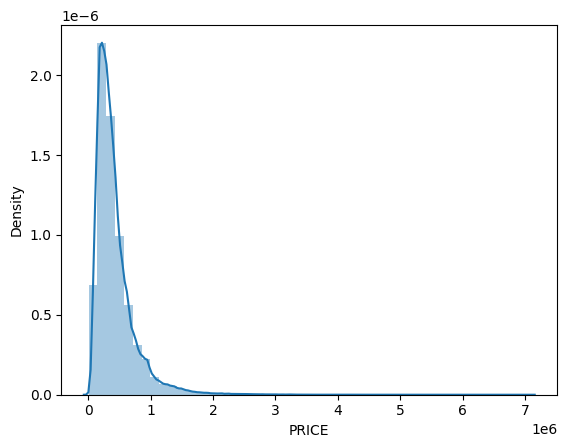

In [ ]:
sns.distplot(train['PRICE'])

**apartment_id**

In [ ]:
train['apartment_id'].describe(), test['apartment_id'].describe()

(count    329690.000000
 mean       2200.879177
 std        1301.361025
 min           0.000000
 25%        1057.000000
 50%        2188.000000
 75%        3347.000000
 max        4419.000000
 Name: apartment_id, dtype: float64,
 count    85097.000000
 mean      2202.428770
 std       1301.522752
 min          0.000000
 25%       1056.000000
 50%       2221.000000
 75%       3341.000000
 max       4419.000000
 Name: apartment_id, dtype: float64)

In [ ]:
train['apartment_id'].nunique(), test['apartment_id'].nunique()

(4419, 3957)

In [ ]:
4391 in test['apartment_id']

True

**city**

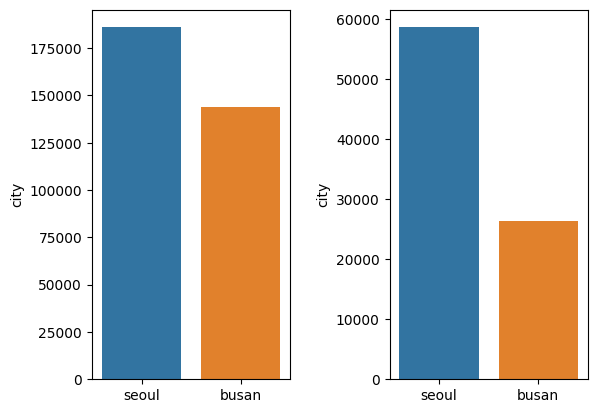

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=['seoul', 'busan'], y=train['city'].value_counts(), ax=ax1)
sns.barplot(x=['seoul', 'busan'], y=test['city'].value_counts(), ax=ax2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

city
busan    263637.948275
seoul    547253.290896
Name: PRICE, dtype: float64


<Axes: xlabel='city', ylabel='PRICE'>

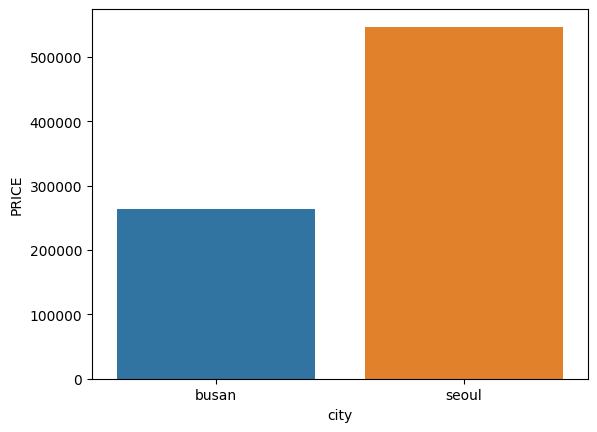

In [ ]:
print(train.groupby(['city'])['PRICE'].mean())
sns.barplot(x=train.groupby(['city'])['PRICE'].mean().index, y=train.groupby(['city'])['PRICE'].mean())

**dong**

In [ ]:
train['dong'].describe(), test['dong'].describe()

(count    329690.000000
 mean        113.374546
 std          67.664274
 min           0.000000
 25%          56.000000
 50%         109.000000
 75%         171.000000
 max         236.000000
 Name: dong, dtype: float64,
 count    85097.000000
 mean       111.969118
 std         66.376688
 min          0.000000
 25%         57.000000
 50%        109.000000
 75%        170.000000
 max        236.000000
 Name: dong, dtype: float64)

In [ ]:
train['dong'].nunique(), test['dong'].nunique()

(203, 202)

In [ ]:
set(test['dong']) - set(train['dong'])

set()

In [ ]:
set(train['dong'][train['city']=='seoul']).intersection(set(train['dong'][train['city']=='busan'])), set(test['dong'][test['city']=='seoul']).intersection(set(test['dong'][test['city']=='busan']))

({120}, {120})

**house_area**

0.5615683423529758

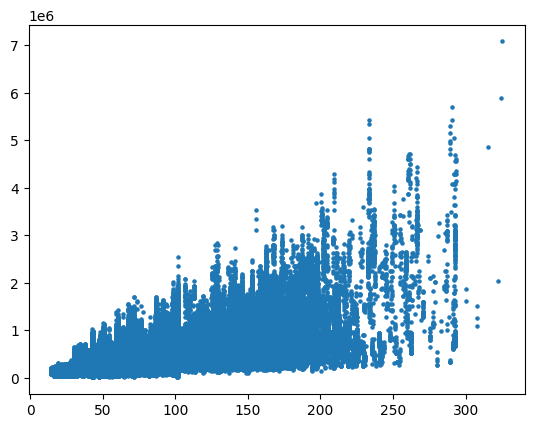

In [ ]:
plt.scatter(train['house_area'], train['PRICE'], s=5)
np.corrcoef(train['house_area'], train['PRICE'])[0, 1]

**built_year**


In [ ]:
train['built_year'].describe(), test['built_year'].describe()

(count    329690.000000
 mean       1998.201474
 std           9.099311
 min        1962.000000
 25%        1992.000000
 50%        1999.000000
 75%        2005.000000
 max        2016.000000
 Name: built_year, dtype: float64,
 count    85097.000000
 mean      1998.371564
 std          9.633915
 min       1962.000000
 25%       1992.000000
 50%       1999.000000
 75%       2006.000000
 max       2016.000000
 Name: built_year, dtype: float64)

0.08170116319438053

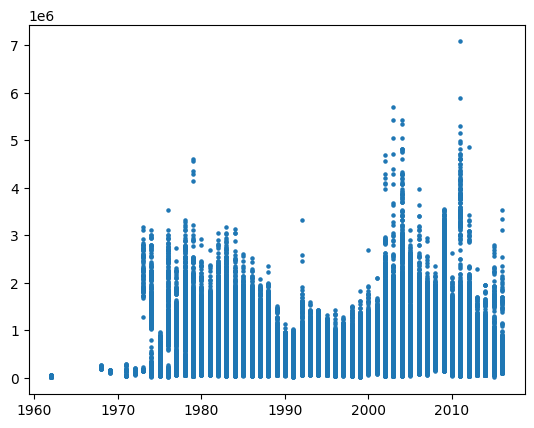

In [ ]:
plt.scatter(train['built_year'], train['PRICE'], s=5)
np.corrcoef(train['built_year'], train['PRICE'])[0, 1]

**floor**

In [ ]:
train['floor'].describe(), test['floor'].describe()

(count    329690.000000
 mean          9.649725
 std           6.893568
 min          -4.000000
 25%           4.000000
 50%           8.000000
 75%          13.000000
 max          70.000000
 Name: floor, dtype: float64,
 count    85097.000000
 mean         9.646333
 std          6.725972
 min         -3.000000
 25%          4.000000
 50%          9.000000
 75%         13.000000
 max         70.000000
 Name: floor, dtype: float64)

0.13749912778560558

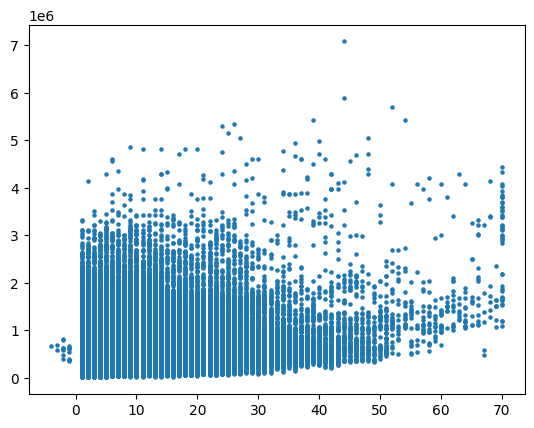

In [ ]:
plt.scatter(train['floor'], train['PRICE'], s=5)
np.corrcoef(train['floor'], train['PRICE'])[0, 1]

**lat, long**

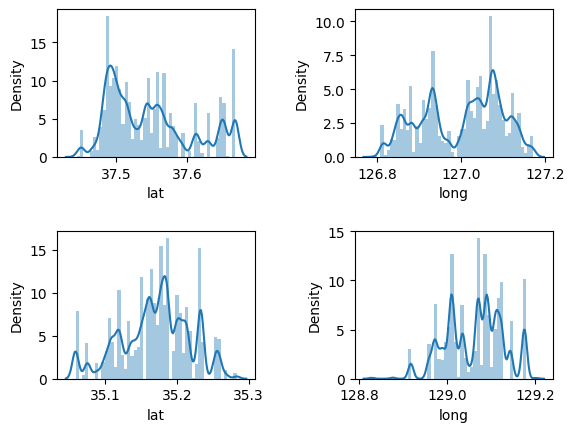

In [ ]:
fig, axes = plt.subplots(2, 2)
sns.distplot(train['lat'][train['city']=='seoul'], ax=axes[0,0])
sns.distplot(train['long'][train['city']=='seoul'], ax=axes[0,1])
sns.distplot(train['lat'][train['city']=='busan'], ax=axes[1,0])
sns.distplot(train['long'][train['city']=='busan'], ax=axes[1,1])
plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [ ]:
print(np.corrcoef(train['lat'][train['city']=='seoul'], train['PRICE'][train['city']=='seoul'])[0, 1], np.corrcoef(train.dropna()['lat'][train.dropna()['city']=='busan'], train.dropna()['PRICE'][train.dropna()['city']=='busan'])[0, 1])

-0.3530015013682778 0.039652580496743715


In [ ]:
print(np.corrcoef(train['long'][train['city']=='seoul'], train['PRICE'][train['city']=='seoul'])[0, 1], np.corrcoef(train.dropna()['long'][train.dropna()['city']=='busan'], train.dropna()['PRICE'][train.dropna()['city']=='busan'])[0, 1])

0.19556148358658254 0.23962547785570498


**transaction year, month, day**

<Axes: xlabel='transaction_year', ylabel='PRICE'>

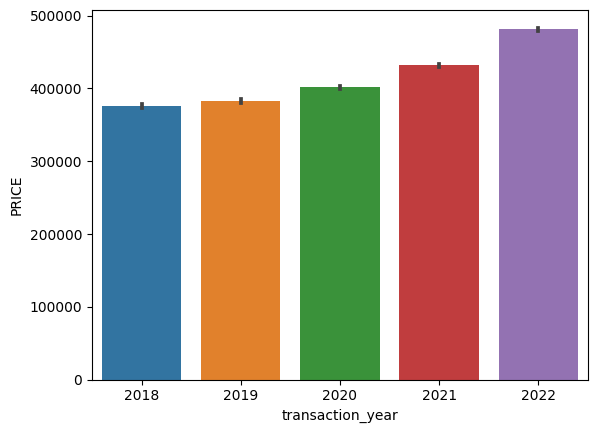

In [ ]:
sns.barplot(x='transaction_year', y='PRICE', data=train)

**dong and lat, long**

In [ ]:
# dong 120 appears in both seoul and busan
train[train['dong']!=120].groupby('dong')['lat'].var().max(), test[test['dong']!=120].groupby('dong')['lat'].var().max()

(0.0, 0.0)

In [ ]:
train2 = train.copy()
test2 = test.copy()

# replacing lat and long of the missing values by mean lat and long of busan
train2['lat'] = train2['lat'].fillna(np.mean(train2[train2['city']=='busan']['lat']))
train2['long'] = train2['long'].fillna(np.mean(train2[train2['city']=='busan']['long']))
test2['lat'] = test2['lat'].fillna(np.mean(test2[test2['city']=='busan']['lat']))
test2['long'] = test2['long'].fillna(np.mean(test2[test2['city']=='busan']['long']))

In [ ]:
def tm(y,m,d):
  if d == '1~10':
    dd = 0
  elif d == '11~20':
    dd = 1
  else:
    dd = 2
  return (y-2018)*36+(m-1)*3+dd

transaction_time = []
for i in range(len(train)):
  t = tm(train2['transaction_year'].iloc[i], train2['transaction_month'].iloc[i], train2['transaction_day'].iloc[i])
  transaction_time.append(t)
train2['transaction_time'] = transaction_time

transaction_time_test = []
for i in range(len(test)):
  t = tm(test2['transaction_year'].iloc[i], test2['transaction_month'].iloc[i], test2['transaction_day'].iloc[i])
  transaction_time_test.append(t)
test2['transaction_time'] = transaction_time_test

In [ ]:
train2.loc[((train2['city'] == 'busan') & (train2['dong'] == 120)), 'dong'] = 237

test2.loc[((test2['city'] == 'busan') & (test2['dong'] == 120)), 'dong'] = 237

In [ ]:
apt_mean = dict(train2.groupby('apartment_id')['PRICE'].mean())
apt_mean[4391] = train2[train2['dong'] == 190]['PRICE'].mean() # apt 4391 is in dong 190
apt_mean = {key: np.log(value) for key, value in apt_mean.items()}

dong_mean = dict(train2.groupby('dong')['PRICE'].mean())
dong_mean = {key: np.log(value) for key, value in dong_mean.items()}

# 4. Modeling

In [ ]:
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb

# estimate time effects on PRICE
time_price = LinearRegression().fit(train2[['transaction_time']], np.log(train2['PRICE']))

In [ ]:
val_accs = []

train3 = train2.copy()
# to use TimeSeriesSplit, sorted by time
train3 = train3.sort_values('transaction_time')

train3['apt_mean'] = train3['apartment_id'].map(apt_mean)
train3['dong_mean'] = train3['dong'].map(dong_mean)

train_cols = ['apartment_id', 'house_area', 'floor', 'lat', 'long', 'built_year', 'transaction_time', 'apt_mean', 'dong', 'dong_mean']

kf = TimeSeriesSplit(n_splits=5)
for i, (tr_index, val_index) in enumerate(kf.split(train3)):
    if i!=4 :continue
    tr_x, tr_y = train3[train_cols].iloc[tr_index], train3.iloc[tr_index]['PRICE']
    val_x, val_y = train3[train_cols].iloc[val_index], train3.iloc[val_index]['PRICE']

    # By lat, separate seoul and busan data
    tr_x_s = tr_x[tr_x['lat'] > 36]
    tr_x_b = tr_x[tr_x['lat'] <= 36]
    tr_y_s = tr_y[tr_x['lat'] > 36]
    tr_y_b = tr_y[tr_x['lat'] <= 36]
  
    model_s_l = ExtraTreesRegressor(n_estimators=10)
    model_b_l = ExtraTreesRegressor(n_estimators=10)
    model_s_r = RandomForestRegressor(n_estimators=10)
    model_b_r = RandomForestRegressor(n_estimators=10)

    def trans(x, y):
      y = np.log(y)
      y = y - time_price.predict(x[['transaction_time']])
      return y

    def trans_inv(x, y):
      y = y + time_price.predict(x[['transaction_time']])
      y = np.exp(y)
      return y
    
    model_s_l.fit(tr_x_s[train_cols], trans(tr_x_s, tr_y_s))
    model_b_l.fit(tr_x_b[train_cols], trans(tr_x_b, tr_y_b))
    model_s_r.fit(tr_x_s[train_cols], trans(tr_x_s, tr_y_s))
    model_b_r.fit(tr_x_b[train_cols], trans(tr_x_b, tr_y_b))

    # val_x    
    pred_val = np.zeros(len(val_x))

    seoul_idx = val_x['lat'] > 36
    busan_idx = val_x['lat'] <= 36
    data_s = val_x[seoul_idx]
    data_b = val_x[busan_idx]

    pred_val[seoul_idx] = model_s_l.predict(data_s)
    pred_val[busan_idx] = model_b_l.predict(data_b)

    pred_val = trans_inv(val_x, pred_val)

    rf_acc = mean_absolute_error(val_y, pred_val)
    val_accs.append(rf_acc)
    
    print(f'Fold{i}: MAE {rf_acc:.4f}')
print(f'Average MAE {np.mean(val_accs):.4f}')

Fold4: MAE 27820.3868
Average MAE 27820.3868


In [ ]:
train3 = train2.copy()
test3 = test2.copy()

train3['apt_mean'] = train3['apartment_id'].map(apt_mean)
train3['dong_mean'] = train3['dong'].map(dong_mean)
test3['apt_mean'] = test3['apartment_id'].map(apt_mean)
test3['dong_mean'] = test3['dong'].map(dong_mean)

train_cols = ['apartment_id', 'house_area', 'floor', 'lat', 'long', 'built_year', 'transaction_time', 'apt_mean', 'dong', 'dong_mean']

tr_x, tr_y = train3[train_cols], train3['PRICE']
test_x = test3[train_cols]

tr_x_s = tr_x[tr_x['lat'] > 36]
tr_x_b = tr_x[tr_x['lat'] <= 36]

tr_y_s = tr_y[tr_x['lat'] > 36]
tr_y_b = tr_y[tr_x['lat'] <= 36]

model_s_e = ExtraTreesRegressor(n_estimators=100)
model_b_e = ExtraTreesRegressor(n_estimators=100)
model_s_r = RandomForestRegressor(n_estimators=100)
model_b_r = RandomForestRegressor(n_estimators=100)

def trans(x, y):
  y = np.log(y)
  y = y - time_price.predict(x[['transaction_time']])
  return y

def trans_inv(x, y):
  y = y + time_price.predict(x[['transaction_time']])
  y = np.exp(y)
  return y

model_s_e.fit(tr_x_s[train_cols], trans(tr_x_s, tr_y_s))
model_b_e.fit(tr_x_b[train_cols], trans(tr_x_b, tr_y_b))
model_s_r.fit(tr_x_s[train_cols], trans(tr_x_s, tr_y_s))
model_b_r.fit(tr_x_b[train_cols], trans(tr_x_b, tr_y_b))

# test_x    
predictions = np.zeros(len(test_x))

seoul_idx = test_x['lat'] > 36
busan_idx = test_x['lat'] <= 36
data_s = test_x[seoul_idx]
data_b = test_x[busan_idx]

predictions[seoul_idx] = 0.67*model_s_e.predict(data_s) + 0.33*model_s_r.predict(data_s)
predictions[busan_idx] = 0.67*model_b_e.predict(data_b) + 0.33*model_b_r.predict(data_b)

predictions = trans_inv(test_x, predictions)

# 5. Make submission

In [ ]:
pd.DataFrame({'index':test['index'].values, 'PRICE':predictions}).to_csv(os.path.join(OUTPUT_DIR, 'baseline.csv'), index=False)